In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('E:\projects\chess game\games.csv')

In [3]:
import seaborn as sns
sns.set()

In [3]:
#creating some new columns/features

df['time_diff']=df['last_move_at']-df['created_at']
df['length']=df['increment_code'].str.split('+',expand=True)[0]
df['increment']=df['increment_code'].str.split('+',expand=True)[1]

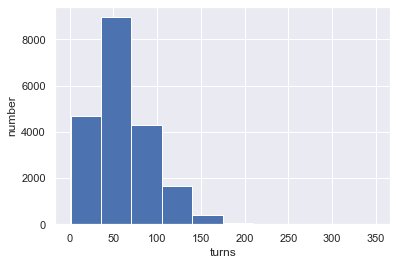

In [4]:
#checkin turns column
fig,ax=plt.subplots()
ax.hist(df['turns'])
ax.set_xlabel('turns')
ax.set_ylabel('number')
plt.show()
#most matches end having turns around 50 and there are less matches that goes above 100 turns

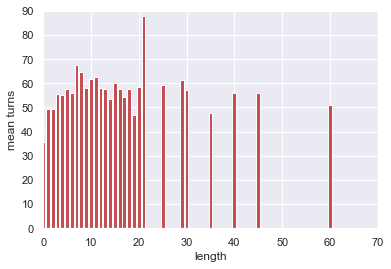

In [7]:
#grouping turns by length
df['length_int']=df['length'].apply(lambda x: int(x))
length_vs_turns=df.groupby('length_int')['turns'].mean()
fig,ax=plt.subplots()
ax.bar(length_vs_turns.index,length_vs_turns.values,color='r')
ax.set_xlabel('length')
ax.set_ylabel('mean turns')
ax.set_xlim(0,70)
ax.set_ylim(0,90)
plt.show()

#result= most of the turns vary bet 50 to 60

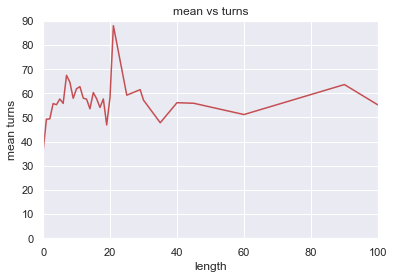

In [16]:
#simple plot
fig,ax=plt.subplots()
ax.plot(length_vs_turns.index,length_vs_turns.values,color='r')
ax.set_xlabel('length')
ax.set_ylabel('mean turns')
ax.set_xlim(0,100)
ax.set_ylim(0,90)
ax.set_title('mean vs turns')
plt.show()
fig.savefig('length vs turn.png',dpi=300)

In [11]:
fig.savefig('length vs turn2.png',dpi=300)

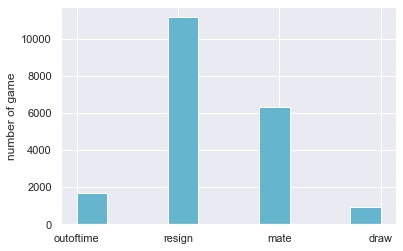

In [13]:
#checking victory status column

fig,ax=plt.subplots()
ax.hist(df['victory_status'],color='c')
ax.set_ylabel('number of game')
plt.show()

fig.savefig('victory_status',dpi=300)

#conclusion most of people resign and then mate

In [14]:
#checking winner column
winner_count=df['winner'].value_counts()
winner_count

white    10001
black     9107
draw       950
Name: winner, dtype: int64

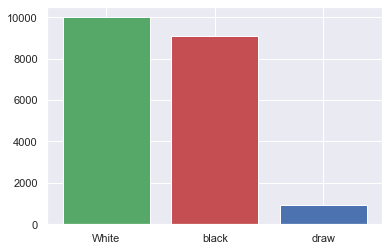

In [15]:
fig,ax=plt.subplots()
ax.bar('White',winner_count['white'],color='g')
ax.bar('black',winner_count['black'],color='r')
ax.bar('draw',winner_count['draw'],color='b')
plt.show()

#conclusion= lil bias towards white(1st move)
fig.savefig('winner_col_hist',dpi=300)

In [17]:
#checking rating white and black

m1=df['white_rating'].mean()
m2=df['black_rating'].mean()
print("mean of white rating is "+str(m1))
print("mean of black rating is "+str(m2))
print('difference = ',str(m1-m2))
print('-'*50)
print('max of white rating = ',df['white_rating'].max())
print('max of black rating = ',df['black_rating'].max())
print('-'*50)
print('min of white rating = ',df['white_rating'].min())
print('min of black rating = ',df['black_rating'].min())

#conclusion- no any significant diff bet their mean
#max rating=2723 min=784

mean of white rating is 1596.6318675840064
mean of black rating is 1588.8319872370128
difference =  7.799880346993632
--------------------------------------------------
max of white rating =  2700
max of black rating =  2723
--------------------------------------------------
min of white rating =  784
min of black rating =  789


In [18]:
#new feature rating difrence
df['rating_diff']=(df['white_rating']-df['black_rating']).apply(lambda x: x if x>=0 else x*(-1))
df.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,...,black_rating,moves,opening_eco,opening_name,opening_ply,time_diff,length,increment,length_int,rating_diff
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,...,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,0.0,15,2,15,309
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,...,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4,0.0,5,10,5,61
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,...,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3,0.0,5,10,5,4
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,...,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3,0.0,20,0,20,15
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,...,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5,0.0,30,3,30,54


max diff 1605
min diff 0


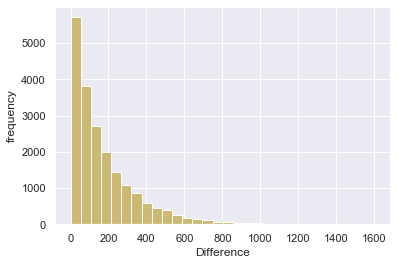

In [22]:
print('max diff',df['rating_diff'].max())
print('min diff',df['rating_diff'].min())
df['rating_diff'].hist(bins=30,color='y')
plt.xlabel('Difference')
plt.ylabel('frequency')
plt.show()

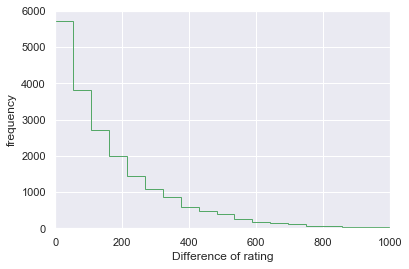

<Figure size 432x288 with 0 Axes>

In [27]:
ig,ax=plt.subplots()
ax.hist(df['rating_diff'],color='g',histtype='step',bins=30)
ax.set_xlabel('Difference of rating')
ax.set_ylabel('frequency')
ax.set_xlim(0,1000)
ax.set_ylim(0,6000)
plt.show()
plt.savefig('diff_rating.png')

In [4]:
#creating 4 new features whih will tell about 1st move

df['white_firts_move']=df['moves'].str.split(' ',expand=True)[0]
df['black_first_move']=df['moves'].str.split(' ',expand=True)[1].str.split(' ',expand=True)[0]

df['black_first_move'].fillna('00',inplace=True)

df['white_firts_move_1']=df['white_firts_move'].apply(lambda x: x[0])
df['black_first_move_1']=df['black_first_move'].apply(lambda x: x[0])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 23 columns):
id                    20058 non-null object
rated                 20058 non-null bool
created_at            20058 non-null float64
last_move_at          20058 non-null float64
turns                 20058 non-null int64
victory_status        20058 non-null object
winner                20058 non-null object
increment_code        20058 non-null object
white_id              20058 non-null object
white_rating          20058 non-null int64
black_id              20058 non-null object
black_rating          20058 non-null int64
moves                 20058 non-null object
opening_eco           20058 non-null object
opening_name          20058 non-null object
opening_ply           20058 non-null int64
time_diff             20058 non-null float64
length                20058 non-null object
increment             20058 non-null object
white_firts_move      20058 non-null object
black_first_mo

In [7]:
#about 2nd move
#if only firts move is recorded
df['moves_1']=df['moves'].apply(lambda x: x if len(x)>15 else x+' 00 00 00 00')

df['white_2nd_move']=df['moves_1'].apply(lambda x: x.split(' ')[2][0])
df['black_2nd_move']=df['moves_1'].apply(lambda x: x.split(' ')[3][0])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 19 columns):
id                20058 non-null object
rated             20058 non-null bool
created_at        20058 non-null float64
last_move_at      20058 non-null float64
turns             20058 non-null int64
victory_status    20058 non-null object
winner            20058 non-null object
increment_code    20058 non-null object
white_id          20058 non-null object
white_rating      20058 non-null int64
black_id          20058 non-null object
black_rating      20058 non-null int64
moves             20058 non-null object
opening_eco       20058 non-null object
opening_name      20058 non-null object
opening_ply       20058 non-null int64
moves_1           20058 non-null object
white_2nd_move    20058 non-null object
black_2nd_move    20058 non-null object
dtypes: bool(1), float64(2), int64(4), object(12)
memory usage: 2.8+ MB


In [6]:
#separating the opening move name of white and black

df['white_op_move']=df['opening_name'].str.split(':',expand=True)[0]

df['black_op_move']=df['opening_name'].apply(lambda x: 'NA' if len(x.split(': '))==1 else x.split(': ')[1])

In [8]:
df.to_csv('E:\projects\chess game\game_preprocessed.csv',index=False)

In [4]:
#again loading data
data=pd.read_csv('E:\projects\chess game\game_preprocessed.csv')

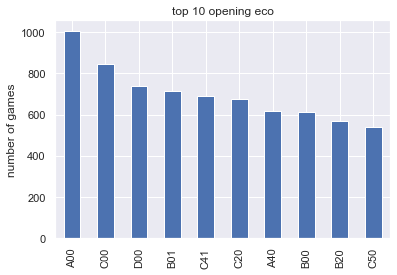

In [6]:
#targetting opening eco
oec=data['opening_eco'].value_counts()
oec=oec[oec>500]
#pplotting top 10
fg=plt.figure()
oec.plot(kind='bar')
plt.ylabel('number of games')
plt.title('top 10 opening eco')
plt.show()

In [7]:
#increment_col
no_increment_games=data['increment'].value_counts()[0]
#perctage of games having no increment
percent=no_increment_games*100/data.shape[0]
percent
#53% games are played with no increment

55.32954432146774

In [8]:
#most popular first move name

data['black_op_move'].value_counts()

Normal Variation                                   319
Exchange Variation                                 307
Bowdler Attack                                     296
Knight Variation                                   271
Mieses-Kotroc Variation                            259
                                                  ... 
Classical Variation |  Carlsbad Variation            1
Classical Variation |  Center Holding Variation      1
Panov Attack |  Gunderam Attack                      1
Dragon Variation |  Levenfish Variation              1
Rubinstein Variation |  Kasparov Attack              1
Name: black_op_move, Length: 1155, dtype: int64

In [9]:
data['white_op_move'].value_counts()

Sicilian Defense                                  2573
French Defense                                    1306
Queen's Pawn Game                                 1059
Italian Game                                       981
King's Pawn Game                                   917
                                                  ... 
King's Gambit Accepted |  Abbazia Defense            1
Benko Gambit Accepted |  Pawn Return Variation       1
Benko Gambit Declined |  Main Line                   1
Petrov's Defense #5                                  1
King's Gambit Accepted |  Greco Gambit               1
Name: white_op_move, Length: 227, dtype: int64

In [5]:
#creating two data frames
df1=pd.DataFrame(data['white_firts_move_1'].value_counts()).reset_index()
df2=pd.DataFrame(data['black_first_move_1'].value_counts()).reset_index()
df3=pd.merge(df1,df2,how='left')
df3

,index,white_firts_move_1,black_first_move_1
0,e,13014,9071
1,d,4653,4210
2,N,843,2103
3,c,772,3617
4,b,261,311
5,g,224,405
6,f,189,207
7,a,55,73
8,h,47,43


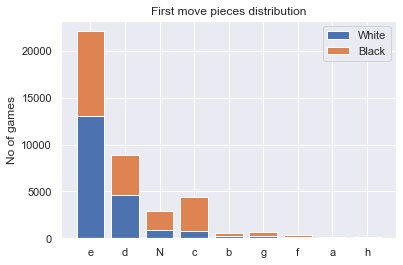

In [6]:
fig,ax=plt.subplots()
ax.bar(df3['index'],df3['white_firts_move_1'],label='White')
ax.bar(df3['index'],df3['black_first_move_1'],bottom=df3['white_firts_move_1'],label='Black')
ax.set_title('First move pieces distribution')
ax.set_ylabel('No of games')
ax.legend()
plt.show()

In [8]:
#now going to check 2nd move...creating two data frames
df1=pd.DataFrame(df['white_2nd_move'].value_counts()).reset_index()
df2=pd.DataFrame(df['black_2nd_move'].value_counts()).reset_index()
df3=pd.merge(df1,df2,how='left')

df3=df3[df3['index'].isin(['N','d','c','B','e','f','Q','g','b'])]

df3

,index,white_2nd_move,black_2nd_move
0,N,8719,7370
1,d,2918,4992
2,c,2557,1206
3,B,1995,1224
4,e,1735,2543
5,f,533,349
6,Q,504,796
7,g,464,832
8,b,222,218


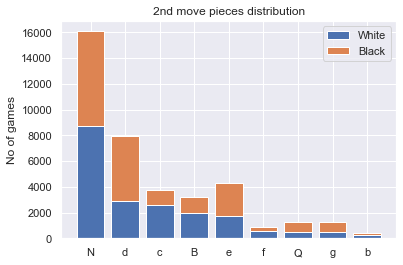

In [9]:
#plotting

fig,ax=plt.subplots()
ax.bar(df3['index'],df3['white_2nd_move'],label='White')
ax.bar(df3['index'],df3['black_2nd_move'],bottom=df3['white_2nd_move'],label='Black')
ax.set_title('2nd move pieces distribution')
ax.set_ylabel('No of games')
ax.legend()
plt.show()

In [10]:
#its all over from my side